In [1]:
import pandas as pd

In [2]:
emotion = pd.read_csv("../../Data/Bayes_emotion_df.csv")

In [3]:
emotion.head()

,문장,감정
0,끝없이 별빛이 내리던 밤 기분 좋은 바람이 두 빰을 스치고 새벽 바다 한곳을 보는 ...,positive
1,날 향해 웃어주는 입술 끝 모양과 저 달보다 사랑스러운 두 눈을 가진 네가 다정히 ...,positive
2,내게 보였던 그 미소 다 너무 예뻐서 더 보고 싶어서 나를 달래고 있죠,positive
3,끝없이 별빛이 내리던 밤 기분 좋은 바람이 두 빰을 스치고 새벽 바다 한곳을 보는 ...,positive
4,너를 기다리다가 문득 행복한 상상이 현실이 되길 기도하니까 내 눈엔 너만 빛나고 있어,positive


In [4]:
import re
import numpy as np
from konlpy.tag import Okt
from sklearn import preprocessing
import tensorflow

In [5]:
okt = Okt()

In [6]:
lyric = emotion.문장[10]
lyric

'비바람이 없어도 봄은 오고 여름은 가고 오 그대여 눈물이 없어도 꽃은 피고 낙엽은 지네 오 내 남은 그리움 세월에 띄우고 잠이 드네 꿈을 꾸네 잠이 드네 꿈을 꾸네'

In [7]:
lyric_text = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ+]","",lyric,count=1)
lyric_text

'비바람이없어도 봄은 오고 여름은 가고 오 그대여 눈물이 없어도 꽃은 피고 낙엽은 지네 오 내 남은 그리움 세월에 띄우고 잠이 드네 꿈을 꾸네 잠이 드네 꿈을 꾸네'

In [8]:
lyric_text = okt.morphs(lyric_text)
print(lyric_text)

['비바람', '이', '없어도', '봄', '은', '오고', '여름', '은', '가고', '오', '그대', '여', '눈물', '이', '없어도', '꽃', '은', '피고', '낙엽', '은', '지네', '오', '내', '남은', '그리움', '세월', '에', '띄우고', '잠', '이', '드', '네', '꿈', '을', '꾸네', '잠', '이', '드', '네', '꿈', '을', '꾸네']


In [9]:
stop_words=set(['이','을','한','곳','을','보는','와','날향해','과','저','내','가','보다','눈','가진',\
                '보였던','그','다','더','나를','있죠','되길','하니까','엔','만','있어','게','으로',\
                '의','볼래요','가는','일이','야','같은','발짝','로','다해','세','할게','할','거야',\
                '여','없어','지네','드','은','오'])
clean_lyric=[token for token in lyric_text if not token in stop_words]

print(clean_lyric)

['비바람', '없어도', '봄', '오고', '여름', '가고', '그대', '눈물', '없어도', '꽃', '피고', '낙엽', '남은', '그리움', '세월', '에', '띄우고', '잠', '네', '꿈', '꾸네', '잠', '네', '꿈', '꾸네']


In [10]:
def preprocessing(lyric,okt,remove_stopwords = False,stop_words=[]):
    lyrics_text = re.sub("[^가-힇ㄱ-ㅎㅏ-ㅣ+]","",lyric)
    lyrics_text1 = okt.morphs(lyrics_text,stem=True)
    if remove_stopwords:
        stop_words=set(['이','을','한','곳','을','보는','와','날향해','과','저','내','가','보다','눈','가진',\
                        '보였던','그','다','더','나를','있죠','되길','하니까','엔','만','있어','게','으로',\
                        '의','볼래요','가는','일이','야','같은','발짝','로','다해','세','할게','할','거야',\
                        '여','없어','지네','드','은','오'])
        clean_lyrics=[token for token in lyric_text if not token in stop_words]
    return clean_lyrics

In [11]:
test = []
for lyric in emotion.문장:
    if type(lyric) == str:
        test.append(preprocessing(lyric,okt,remove_stopwords=True,stop_words=stop_words))
    else:
        test.append([])

In [12]:
test

[['비바람',
  '없어도',
  '봄',
  '오고',
  '여름',
  '가고',
  '그대',
  '눈물',
  '없어도',
  '꽃',
  '피고',
  '낙엽',
  '남은',
  '그리움',
  '세월',
  '에',
  '띄우고',
  '잠',
  '네',
  '꿈',
  '꾸네',
  '잠',
  '네',
  '꿈',
  '꾸네'],
 ['비바람',
  '없어도',
  '봄',
  '오고',
  '여름',
  '가고',
  '그대',
  '눈물',
  '없어도',
  '꽃',
  '피고',
  '낙엽',
  '남은',
  '그리움',
  '세월',
  '에',
  '띄우고',
  '잠',
  '네',
  '꿈',
  '꾸네',
  '잠',
  '네',
  '꿈',
  '꾸네'],
 ['비바람',
  '없어도',
  '봄',
  '오고',
  '여름',
  '가고',
  '그대',
  '눈물',
  '없어도',
  '꽃',
  '피고',
  '낙엽',
  '남은',
  '그리움',
  '세월',
  '에',
  '띄우고',
  '잠',
  '네',
  '꿈',
  '꾸네',
  '잠',
  '네',
  '꿈',
  '꾸네'],
 ['비바람',
  '없어도',
  '봄',
  '오고',
  '여름',
  '가고',
  '그대',
  '눈물',
  '없어도',
  '꽃',
  '피고',
  '낙엽',
  '남은',
  '그리움',
  '세월',
  '에',
  '띄우고',
  '잠',
  '네',
  '꿈',
  '꾸네',
  '잠',
  '네',
  '꿈',
  '꾸네'],
 ['비바람',
  '없어도',
  '봄',
  '오고',
  '여름',
  '가고',
  '그대',
  '눈물',
  '없어도',
  '꽃',
  '피고',
  '낙엽',
  '남은',
  '그리움',
  '세월',
  '에',
  '띄우고',
  '잠',
  '네',
  '꿈',
  '꾸네',
  '잠',
  '네',
  '꿈',
  '꾸네'],
 ['비바람',
  '없어도

In [13]:
import nltk

In [14]:
for i in test:
    ko = nltk.Text(i)
ko.vocab().most_common(100)

[('없어도', 2),
 ('잠', 2),
 ('네', 2),
 ('꿈', 2),
 ('꾸네', 2),
 ('비바람', 1),
 ('봄', 1),
 ('오고', 1),
 ('여름', 1),
 ('가고', 1),
 ('그대', 1),
 ('눈물', 1),
 ('꽃', 1),
 ('피고', 1),
 ('낙엽', 1),
 ('남은', 1),
 ('그리움', 1),
 ('세월', 1),
 ('에', 1),
 ('띄우고', 1)]

In [15]:
token_sum = list(ko.vocab())

In [16]:
from tensorflow import keras

In [17]:
# 텍스를 한 줄씩 처리하기
twitter = Okt() 
okt_result = []
lines = emotion.문장
for line in lines:
    # 형태소 분석하기
    train_malist = twitter.pos(line,norm=True,stem=True) # 단어의 기본형 사용
    r = []
    for word in train_malist:
        if not word[1] in ["Josa","Eomi","Puntuation"]:
            if word[0] != "n":
                r.append(word[0])
    rl = (" ".join(r).strip())
    
    okt_result.append(rl)

In [18]:
# 인덱스 0은 없는 단어와 padding으로 집어 넣기 나머지 단어들은 1부터 순차적으로 인덱스 부여

word_to_index = {word[0] : index + 1 for index, word in enumerate(token_sum)}
word_to_index['pad'] = 0 # 패딩용 인덱스 0
word_to_index['unk'] = 0 # unknown 용 인덱스 0


# 기존 훈련 데이터에서 각 단어를 고유한 정수로 부여
encoded = []
for line in okt_result: #입력 데이터에서 1줄씩 문장을 읽음
    temp = []
    for w in line: #각 줄에서 1개씩 글자를 읽음
      try:
        temp.append(word_to_index[w]) # 글자를 해당되는 정수로 변환
      except KeyError: # 단어 집합에 없는 단어일 경우 unk로 대체된다.
        temp.append(word_to_index['unk']) # unk의 인덱스로 변환

    encoded.append(temp)

In [19]:
print((encoded[1]))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 0, 10, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [20]:
import matplotlib.pyplot as plt

가사의 최대 길이 : 167
가사의 최소 길이 : 31
가사의 평균 길이 : 58.700000


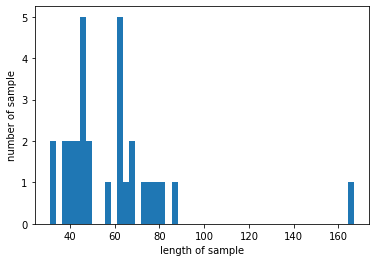

In [21]:
# 정해줄 길이를 찾기 위해 가장 긴 리뷰 길이 확인
max_length = max(len(l) for l in encoded)
print('가사의 최대 길이 : %d' % max_length)
print('가사의 최소 길이 : %d' % min(len(l) for l in encoded))
print('가사의 평균 길이 : %f' % (sum(map(len, encoded))/len(encoded)))
plt.hist([len(s) for s in encoded], bins=50)
plt.xlabel('length of sample')
plt.ylabel('number of sample')
plt.show()

In [22]:
# 문장마다 단어 갯수가 다르므로 sequence padding을 넣어서 문장의 길이 동일하게 만들기 
# 이거하려고 위에서 단어갯수 체크한거임

padding_paragraphs_encoding = keras.preprocessing.sequence.pad_sequences(encoded, maxlen=55, padding='pre')
padding_paragraphs_encoding

array([[ 0,  0,  0, ...,  0, 10,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

In [23]:
print(len(list(padding_paragraphs_encoding)), len(list(padding_paragraphs_encoding)[1]))

30 55


In [24]:
# 분류항목(food,sports)를 수치로 변경하기
categories = emotion['감정'].to_list()

In [25]:
def category_encode(category):
    if category == 'positive':
        return [1,0,0]
    elif category == 'negative':
        return [0,1,0]
    else:
        return [0,0,1]

In [26]:
encoded_category = [category_encode(category) for category in categories]
encoded_category

[[1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 1, 0],
 [0, 1, 0],
 [0, 1, 0],
 [0, 1, 0],
 [0, 1, 0],
 [0, 1, 0],
 [0, 1, 0],
 [0, 1, 0],
 [0, 1, 0],
 [0, 1, 0]]

In [27]:
# train test data 만들기
from sklearn.model_selection import train_test_split


train_input, test_input, train_target, test_target = train_test_split(
    padding_paragraphs_encoding, encoded_category, test_size=0.2
)

In [28]:
# train val data 만들기
trainData, valData, trainTarget, valTarget = train_test_split(
    train_input, train_target, test_size=0.2
)

In [29]:
results = set()
emotion.문장.str.split().apply(results.update)
vocab_size = len(results)
vocab_size

411

In [30]:
model = keras.Sequential()
# 문맥 생성 단계
model.add(keras.layers.Embedding(vocab_size,5,input_length=max_length,input_shape=(55,))) 
# one hot encoding 만드는 애
# Embedding(중복 없는 전체 단어 갯수,index,가장 간 문장의 단어 갯수 )
# 임베딩 레이어는 인덱스를 받아 5차원 벡터의 임베딩을 출력합니다.
model.add(keras.layers.LSTM(128,dropout=0.2))

# 분류 단계
# 분류 단계
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dense(32,activation='relu'))
model.add(keras.layers.Dense(16,activation='relu'))
model.add(keras.layers.Dense(3,activation='softmax'))

In [31]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

In [32]:
import numpy as np

In [33]:
train_x = np.array(train_input)
train_y = np.array(train_target)

In [34]:
val_x = np.array(valData)
val_y = np.array(valTarget)

In [35]:
print(train_x.shape)
print(train_y.shape)

(24, 55)
(24, 3)


In [36]:
print(val_x.shape)
print(val_y.shape)

(5, 55)
(5, 3)


In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 55, 5)             2055      
                                                                 
 lstm (LSTM)                 (None, 128)               68608     
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 3)                 51        
                                                                 
Total params: 81,578
Trainable params: 81,578
Non-traina

In [38]:
history = model.fit(
    train_x,
    train_y,
    epochs=600,
    #batch_size=64, # mini batch 경사 하강법
    validation_data = (val_x, val_y),
    # callbacks = [checkpoint_cb, early_stopping_cb]
)

Epoch 1/600
1/1 [==============================] - 9s 9s/step - loss: 1.0986 - accuracy: 0.3750 - val_loss: 1.0923 - val_accuracy: 0.6000
Epoch 2/600
1/1 [==============================] - 0s 138ms/step - loss: 1.0980 - accuracy: 0.3750 - val_loss: 1.0880 - val_accuracy: 0.6000
Epoch 3/600
1/1 [==============================] - 0s 95ms/step - loss: 1.0968 - accuracy: 0.3750 - val_loss: 1.0826 - val_accuracy: 0.6000
Epoch 4/600
1/1 [==============================] - 0s 82ms/step - loss: 1.0965 - accuracy: 0.3750 - val_loss: 1.0763 - val_accuracy: 0.6000
Epoch 5/600
1/1 [==============================] - 0s 80ms/step - loss: 1.0960 - accuracy: 0.3750 - val_loss: 1.0687 - val_accuracy: 0.6000
Epoch 6/600
1/1 [==============================] - 0s 83ms/step - loss: 1.0958 - accuracy: 0.3750 - val_loss: 1.0600 - val_accuracy: 0.6000
Epoch 7/600
1/1 [==============================] - 0s 82ms/step - loss: 1.0948 - accuracy: 0.3750 - val_loss: 1.0500 - val_accuracy: 0.6000
Epoch 8/600
1/1 [====

In [39]:
print("accuracy :" , np.mean(history.history['accuracy']))
print("val_accuracy :" , np.mean(history.history['val_accuracy']))

accuracy : 0.6745833336313566
val_accuracy : 0.9310000036160151


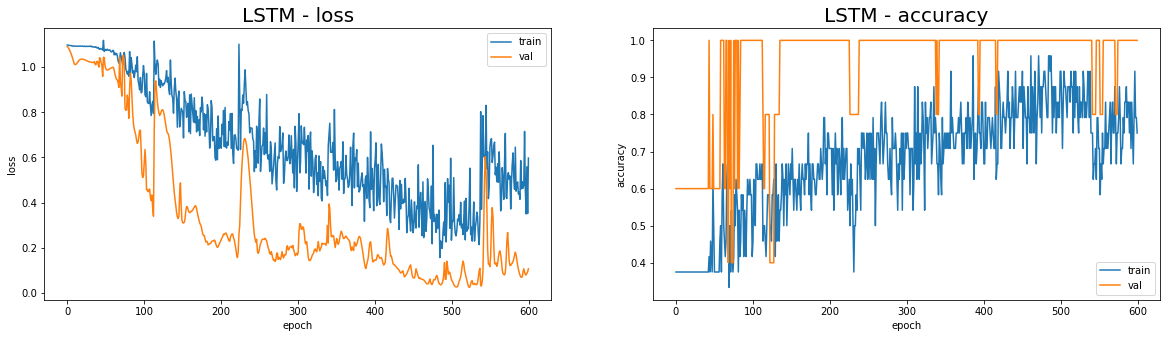

In [40]:
# 시각화 해보기
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(1,2,1) # 1행 2열의 첫번째다.
ax2 = fig.add_subplot(1,2,2) # 1행 2열의 두번째다.

ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])

ax1.set_xlabel('epoch')
ax2.set_xlabel('epoch')

ax1.set_ylabel('loss')
ax2.set_ylabel('accuracy')

ax1.legend(['train','val'])
ax2.legend(['train','val'])


ax1.set_title("LSTM - loss", size=20)
ax2.set_title("LSTM - accuracy", size=20)
plt.show()

In [41]:
test_result = []
test_result.append(model.predict(test_input))

1/1 [==============================] - 1s 1s/step


In [42]:
result = []
for i in range(0,6):    
    result.append(test_result[0][i])

In [43]:
test_result

[array([[6.6437763e-01, 2.9120973e-01, 4.4412665e-02],
        [2.1205395e-02, 4.3779425e-04, 9.7835678e-01],
        [6.0050619e-01, 2.1436435e-01, 1.8512952e-01],
        [9.7903848e-01, 6.2652780e-03, 1.4696350e-02],
        [3.3002260e-01, 7.3343582e-02, 5.9663379e-01],
        [3.0568868e-03, 2.8451512e-05, 9.9691463e-01]], dtype=float32)]

In [44]:
result

[array([0.6643776 , 0.29120973, 0.04441267], dtype=float32),
 array([2.1205395e-02, 4.3779425e-04, 9.7835678e-01], dtype=float32),
 array([0.6005062 , 0.21436435, 0.18512952], dtype=float32),
 array([0.9790385 , 0.00626528, 0.01469635], dtype=float32),
 array([0.3300226 , 0.07334358, 0.5966338 ], dtype=float32),
 array([3.0568868e-03, 2.8451512e-05, 9.9691463e-01], dtype=float32)]

In [45]:
model.save('lstm_bayes_emotion.h5')

In [46]:
import random

In [47]:
len(test)

30

---

## 강사님 코드

In [146]:
# 문장을 불러오기

text = sorted(list(set(emotion.문장)))

In [147]:
# 문자를 하나하나 읽어 들이고 ID 붙이기

chars = sorted(text)
print('사용되고 있는 문자의 수:', len(chars))
char_indices = dict((c, i) for i, c in enumerate(chars)) # 문자 → ID
indices_char = dict((i, c) for i, c in enumerate(chars)) # ID → 문자

사용되고 있는 문자의 수: 28


In [148]:
import numpy as np

In [149]:

maxlen = 20
step = 1
sentences = []
next_chars = []
for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])
print('학습할 구문의 수:', len(sentences))
print('텍스트를 ID 벡터로 변환합니다...')
X = np.zeros((len(sentences), maxlen, len(chars)), dtype=bool)
y = np.zeros((len(sentences), len(chars)), dtype=bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

학습할 구문의 수: 8
텍스트를 ID 벡터로 변환합니다...


In [150]:
from tensorflow import keras

In [168]:
len(chars)

28

In [169]:
# 모델 구축하기(LSTM)

print('모델을 구축합니다...')
model = keras.Sequential()
model.add(keras.layers.LSTM(128, input_shape=(maxlen, len(chars))))
model.add(keras.layers.Dense(len(chars)))
model.add(keras.layers.Activation('softmax'))
optimizer = keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

모델을 구축합니다...


In [170]:
# 후보를 배열에서 꺼내기
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

In [171]:
import random

In [172]:
len(text)

28

In [173]:
import random
import sys

start_index = random.randint(0, len(text) - maxlen - 1)

# 20 에포크 동안 모델을 훈련합니다
for epoch in range(0, 20):
    print('에포크', epoch)
    # 데이터에서 한 번만 반복해서 모델을 학습합니다
    model.fit(X, y, epochs=1)

    # 무작위로 시드 텍스트를 선택합니다
    seed_text = text[start_index: start_index + maxlen]
    print('--- 시드 텍스트: "' + seed_text[epoch] + '"')

    # 여러가지 샘플링 온도를 시도합니다
    for temperature in [0.2, 0.5, 0.8, 1.0, 1.2,1.5]:
        print('------ 온도:', temperature)
        generated_text = seed_text[epoch]
        sys.stdout.write(generated_text)

        # 시드 텍스트에서 시작해서 400개의 글자를 생성합니다
        for i in range(400):
            # 지금까지 생성된 글자를 원-핫 인코딩으로 바꿉니다
            sampled = np.zeros((1, maxlen, len(chars)))
            try:
                for t, char in enumerate(generated_text):
                    sampled[0, t, char_indices[char]] =1.0
            
            # 다음 글자를 샘플링합니다
                preds = model.predict(sampled, verbose=0)[0]
                next_index = sample(preds, temperature)
                next_char = chars[next_index]

                generated_text += next_char
                generated_text = generated_text[1:]

                sys.stdout.write(next_char)
                sys.stdout.flush()
            except:
                np.append(sampled,0)
        print()

에포크 0
1/1 [==============================] - 5s 5s/step - loss: 3.3367
--- 시드 텍스트: "가벼운 발걸음 닿는 대로 끝없이 이어진 길을 천천히 걸어가네 내가 자라고 정든 이 거리를 난 가끔 그리워하겠지만 이렇게 나는 떠나네 더 넓은 세상으로"
------ 온도: 0.2
가벼운 발걸음 닿는 대로 끝없이 이어진 길을 천천히 걸어가네 내가 자라고 정든 이 거리를 난 가끔 그리워하겠지만 이렇게 나는 떠나네 더 넓은 세상으로
------ 온도: 0.5
가벼운 발걸음 닿는 대로 끝없이 이어진 길을 천천히 걸어가네 내가 자라고 정든 이 거리를 난 가끔 그리워하겠지만 이렇게 나는 떠나네 더 넓은 세상으로
------ 온도: 0.8
가벼운 발걸음 닿는 대로 끝없이 이어진 길을 천천히 걸어가네 내가 자라고 정든 이 거리를 난 가끔 그리워하겠지만 이렇게 나는 떠나네 더 넓은 세상으로
------ 온도: 1.0
가벼운 발걸음 닿는 대로 끝없이 이어진 길을 천천히 걸어가네 내가 자라고 정든 이 거리를 난 가끔 그리워하겠지만 이렇게 나는 떠나네 더 넓은 세상으로
------ 온도: 1.2
가벼운 발걸음 닿는 대로 끝없이 이어진 길을 천천히 걸어가네 내가 자라고 정든 이 거리를 난 가끔 그리워하겠지만 이렇게 나는 떠나네 더 넓은 세상으로
------ 온도: 1.5
가벼운 발걸음 닿는 대로 끝없이 이어진 길을 천천히 걸어가네 내가 자라고 정든 이 거리를 난 가끔 그리워하겠지만 이렇게 나는 떠나네 더 넓은 세상으로
에포크 1
1/1 [==============================] - 0s 23ms/step - loss: 3.2709
--- 시드 텍스트: "고요한 바다 위로 내 노래가 떠간다 소리도 부끄러워 숨죽이고 떠간다"
------ 온도: 0.2
고요한 바다 위로 내 노래가 떠간다 소리도 부끄러워 숨죽이고 떠간다
------ 온도: 0.5
고요한 바다 위로 내 노래가 떠간다 소리도 부끄러워 숨죽이고 떠간다
------